# Simple California Demo 2.0



This notebook shows how to use build a hierarchical clustering of the input features and use it to explain a single instance. This is a good way to explain a single instance when the number of input features is large.
When given a balanced partition tree PartitionExplainer has $O(M^2)$ runtime, where $M$ is the number of input features. This is much better than the $O(2^M)$ runtime of KernelExplainer.

In [4]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.cluster
from xgboost import XGBRegressor

import shap

seed = 2023
np.random.seed(seed)

## Train a model

In [6]:
X, y = shap.datasets.california()
model = XGBRegressor(n_estimators=100, subsample=0.3)
model.fit(X, y)

instance = X[0:1]
references = X[1:100]

In [7]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


## Compute a hierarchical clustering of the input features

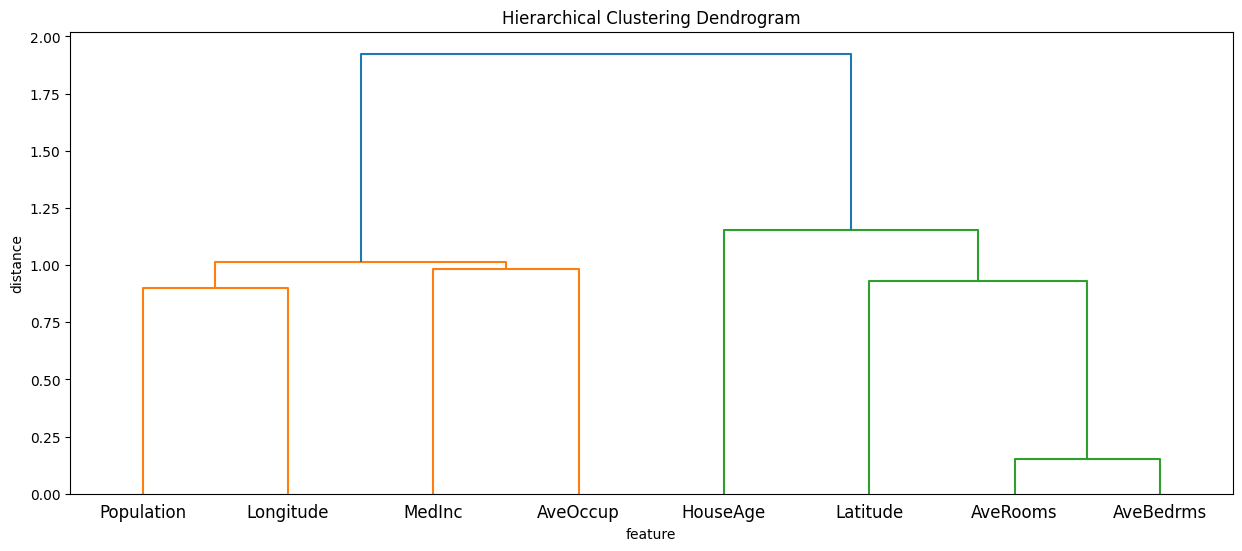

In [9]:
partition_tree = shap.utils.partition_tree(X)
plt.figure(figsize=(15, 6))
sp.cluster.hierarchy.dendrogram(partition_tree, labels=X.columns)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("feature")
plt.ylabel("distance")
plt.show()

## Explain the instance

In [11]:
partition_hierarchy_1 = {
    "cluster_12": {
        "cluster_11": {"AveOccup": "AveOccup", "cluster_plus1": {"MedInc": "MedInc"}},
        "cluster_9": {
            "Longitude": "Longitude",
            "cluster_plus2": {"Population": "Population"},
        },
    },
    "cluster_13": {
        "HouseAge": "HouseAge",
        "cluster_10": {
            "Latitude": "Latitude",
            "cluster_8": {"AveBedrms": "AveBedrms", "AveRooms": "AveRooms"},
        },
    },
}


partition_hierarchy = {
    "HouseCharacteristics": {
        "AveBedrms": "AveBedrms",
        "AveRooms": "AveRooms",
        "AveOccup": "AveOccup",
        "HouseAge": "HouseAge",
    },
    "Area": {
        "Location": {"Latitude": "Latitude", "Longitude": "Longitude"},
        "Neighbours": {"MedInc": "MedInc", "Population": "Population"},
    },
}

partition_hierarchy_2 = {
    "Activity": {
        "MedInc": "MedInc",
        "AveOccup": "AveOccup",
        "Population": "Population",
    },
    "Material": {
        "AveBedrms": "AveBedrms",
        "AveRooms": "AveRooms",
        "HouseAge": "HouseAge",
    },
    "Location": {"Latitude": "Latitude", "Longitude": "Longitude"},
}

partition_hierarchy_3 = {
    "AveOccup": "AveOccup",
    "MedInc": "MedInc",
    "Longitude": "Longitude",
    "Population": "Population",
    "HouseAge": "HouseAge",
    "Latitude": "Latitude",
    "AveBedrms": "AveBedrms",
    "AveRooms": "AveRooms",
}

In [12]:
# partition_hierarchy4 = {
#     'cluster_1': {
#         'Game Information': {
#             'Identifiers': {
#                 'id': 'id',
#                 'matchid': 'matchid',
#                 'gameid': 'gameid',
#                 'platformid': 'platformid'
#             },
#             'Context': {
#                 'queueid': 'queueid',
#                 'seasonid': 'seasonid'
#             },
#             'Timing': {
#                 'creation': 'creation',
#                 'version': 'version',
#                 'duration': 'duration'
#             }
#         },
#         'Player Information': {
#             'Player Metadata': {
#                 'player': 'player',
#                 'championid': 'championid'
#             },
#             'Summoner Spells': {
#                 'ss1': 'ss1',
#                 'ss2': 'ss2'
#             },
#             'Role and Position': {
#                 'role': 'role',
#                 'position': 'position'
#             }
#         }
#     },
#     'cluster_2': {
#         'Items': {
#             'Main Items': {
#                 'item1': 'item1',
#                 'item2': 'item2',
#                 'item3': 'item3',
#                 'item4': 'item4',
#                 'item5': 'item5',
#                 'item6': 'item6'
#             },
#             'Trinket': {
#                 'trinket': 'trinket'
#             }
#         },
#         'Kills and Deaths': {
#             'Kill Metrics': {
#                 'Kills per min.': 'Kills per min.',
#                 'largestkillingspree': 'largestkillingspree',
#                 'largestmultikill': 'largestmultikill',
#                 'Killing sprees per min.': 'Killing sprees per min.',
#                 'Double kills per min.': 'Double kills per min.',
#                 'Triple kills per min.': 'Triple kills per min.',
#                 'Quadra kills per min.': 'Quadra kills per min.',
#                 'Penta kills per min.': 'Penta kills per min.',
#                 'Legendary kills per min.': 'Legendary kills per min.'
#             },
#             'Death Metrics': {
#                 'Deaths per min.': 'Deaths per min.'
#             },
#             'Assist Metrics': {
#                 'Assists per min.': 'Assists per min.'
#             },
#             'Survival Metrics': {
#                 'Longest time living as % of game': 'Longest time living as % of game'
#             }
#         }
#     },
#     'cluster_3': {
#         'Damage': {
#             'Dealt Damage': {
#                 'Total damage dealt per min.': 'Total damage dealt per min.',
#                 'Magic damage dealt per min.': 'Magic damage dealt per min.',
#                 'Physical damage dealt per min.': 'Physical damage dealt per min.',
#                 'True damage dealt per min.': 'True damage dealt per min.',
#                 'largestcrit': 'largestcrit'
#             },
#             'Damage to Champions': {
#                 'Total damage to champions per min.': 'Total damage to champions per min.',
#                 'Magic damage to champions per min.': 'Magic damage to champions per min.',
#                 'Physical damage to champions per min.': 'Physical damage to champions per min.',
#                 'True damage to champions per min.': 'True damage to champions per min.'
#             },
#             'Healing': {
#                 'Total healing per min.': 'Total healing per min.',
#                 'Total units healed per min.': 'Total units healed per min.'
#             },
#             'Damage Mitigation': {
#                 'dmgselfmit': 'dmgselfmit'
#             },
#             'Damage to Structures': {
#                 'Damage to objects per min.': 'Damage to objects per min.',
#                 'Damage to turrets': 'Damage to turrets'
#             },
#             'Taken Damage': {
#                 'Total damage taken per min.': 'Total damage taken per min.',
#                 'Magic damage taken per min.': 'Magic damage taken per min.',
#                 'Physical damage taken per min.': 'Physical damage taken per min.',
#                 'True damage taken per min.': 'True damage taken per min.'
#             }
#         }
#     },
#     'cluster_4': {
#         'Vision and Control': {
#             'Vision Score': {
#                 'visionscore': 'visionscore'
#             },
#             'Crowd Control': {
#                 'Time spent with crown control per min.': 'Time spent with crown control per min.',
#                 'Total crown control time dealt per min.': 'Total crown control time dealt per min.'
#             },
#             'Wards': {
#                 'wardskilled': 'wardskilled',
#                 'Pink wards bought per min.': 'Pink wards bought per min.',
#                 'Wards bought per min.': 'Wards bought per min.',
#                 'Wards placed per min.': 'Wards placed per min.'
#             }
#         },
#         'Gold and Objectives': {
#             'Gold Metrics': {
#                 'Gold earned per min.': 'Gold earned per min.',
#                 'Gold spent per min.': 'Gold spent per min.'
#             },
#             'Turrets and Inhibitors': {
#                 '# of turret kills': '# of turret kills',
#                 '# of inhibitor kills': '# of inhibitor kills'
#             },
#             'Minion Kills': {
#                 'Total minions killed per min.': 'Total minions killed per min.',
#                 'Neutral minions killed per min.': 'Neutral minions killed per min.',
#                 'Own jungle kills per min.': 'Own jungle kills per min.',
#                 'Enemy jungle kills per min.': 'Enemy jungle kills per min.'
#             }
#         },
#         'Special Events': {
#             'First Blood': {
#                 'firstblood': 'firstblood'
#             },
#             'Champion Level': {
#                 'champlvl': 'champlvl'
#             }
#         }
#     }
# }

In [13]:
partition_hierarchy5 = {
    "Identifiers": {
        "MatchIdentifiers": {
            "id": "id",
            "matchid": "matchid",
            "gameid": "gameid",
            "platformid": "platformid",
        },
        "PlayerIdentifiers": {
            "player": "player",
            "championid": "championid",
            "role": "role",
            "position": "position",
        },
        "Versioning": {
            "version": "version",
            "queueid": "queueid",
            "seasonid": "seasonid",
        },
    },
    "GameDetails": {
        "Timing": {"duration": "duration", "creation": "creation"},
        "Spells": {"ss1": "ss1", "ss2": "ss2"},
    },
    "Items": {
        "MainItems": {
            "item1": "item1",
            "item2": "item2",
            "item3": "item3",
            "item4": "item4",
            "item5": "item5",
            "item6": "item6",
        },
        "Trinkets": {"trinket": "trinket"},
    },
    "CombatStats": {
        "Kills": {
            "TotalKills": {
                "Kills per min.": "Kills per min.",
                "largestkillingspree": "largestkillingspree",
                "largestmultikill": "largestmultikill",
                "Killing sprees per min.": "Killing sprees per min.",
            },
            "SpecialKills": {
                "Double kills per min.": "Double kills per min.",
                "Triple kills per min.": "Triple kills per min.",
                "Quadra kills per min.": "Quadra kills per min.",
                "Penta kills per min.": "Penta kills per min.",
                "Legendary kills per min.": "Legendary kills per min.",
            },
        },
        "DamageDealt": {
            "TotalDamageDealt": {
                "Total damage dealt per min.": "Total damage dealt per min.",
                "largestcrit": "largestcrit",
            },
            "DamageTypesDealt": {
                "Magic damage dealt per min.": "Magic damage dealt per min.",
                "Physical damage dealt per min.": "Physical damage dealt per min.",
                "True damage dealt per min.": "True damage dealt per min.",
            },
        },
        "DamageToChampions": {
            "TotalDamageToChampions": {
                "Total damage to champions per min.": "Total damage to champions per min."
            },
            "DamageTypesToChampions": {
                "Magic damage to champions per min.": "Magic damage to champions per min.",
                "Physical damage to champions per min.": "Physical damage to champions per min.",
                "True damage to champions per min.": "True damage to champions per min.",
            },
        },
        "Healing": {
            "TotalHealing": {
                "Total healing per min.": "Total healing per min.",
                "Total units healed per min.": "Total units healed per min.",
            }
        },
        "DamageTaken": {
            "TotalDamageTaken": {
                "Total damage taken per min.": "Total damage taken per min."
            },
            "DamageTypesTaken": {
                "Magic damage taken per min.": "Magic damage taken per min.",
                "Physical damage taken per min.": "Physical damage taken per min.",
                "True damage taken per min.": "True damage taken per min.",
            },
        },
        "CrowdControl": {
            "CrowdControlTimes": {
                "Time spent with crown control per min.": "Time spent with crown control per min.",
                "Total crown control time dealt per min.": "Total crown control time dealt per min.",
            }
        },
    },
    "Objectives": {
        "DamageToObjectives": {
            "DamageToObjects": {
                "Damage to objects per min.": "Damage to objects per min."
            },
            "DamageToTurrets": {"Damage to turrets": "Damage to turrets"},
        },
        "ObejctiveKills": {
            "TurretKills": {"# of turret kills": "# of turret kills"},
            "InhibitorKills": {"# of inhibitor kills": "# of inhibitor kills"},
        },
    },
    "Economy": {
        "Gold": {
            "GoldEarned": {"Gold earned per min.": "Gold earned per min."},
            "GoldSpent": {"Gold spent per min.": "Gold spent per min."},
        },
        "Wards": {
            "PinkWards": {"Pink wards bought per min.": "Pink wards bought per min."},
            "OtherWards": {
                "Wards bought per min.": "Wards bought per min.",
                "Wards placed per min.": "Wards placed per min.",
                "wardskilled": "wardskilled",
            },
        },
    },
    "Minions": {
        "TotalMinionsKilled": {
            "Total minions killed per min.": "Total minions killed per min."
        },
        "NeutralMinionsKilled": {
            "Neutral minions killed per min.": "Neutral minions killed per min.",
            "Own jungle kills per min.": "Own jungle kills per min.",
            "Enemy jungle kills per min.": "Enemy jungle kills per min.",
        },
    },
    "Miscellaneous": {
        "LongestTimeLiving": {
            "Longest time living as % of game": "Longest time living as % of game"
        },
        "VisionScore": {"visionscore": "visionscore"},
        "ChampionLevel": {"champlvl": "champlvl"},
        "FirstBlood": {"firstblood": "firstblood"},
        "SelfMitigation": {"dmgselfmit": "dmgselfmit"},
    },
}

In [14]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Define the function to add nodes and edges to the graph
# def add_nodes_edges(graph, parent_name, parent_dict):
#     for key, value in parent_dict.items():
#         if isinstance(value, dict):
#             graph.add_node(key)
#             graph.add_edge(parent_name, key)
#             add_nodes_edges(graph, key, value)
#         else:
#             graph.add_node(value)
#             graph.add_edge(parent_name, value)

# # Create a new directed graph
# G = nx.DiGraph()

# # Add the root node
# root_name = 'Root'
# G.add_node(root_name)

# # Add nodes and edges to the graph
# add_nodes_edges(G, root_name, partition_hierarchy4)

# # Define a top-down hierarchical layout
# def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
#     pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
#     return pos

# def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None, parsed=[]):
#     if pos is None:
#         pos = {root: (xcenter, vert_loc)}
#     else:
#         pos[root] = (xcenter, vert_loc)

#     children = list(G.neighbors(root))
#     if not isinstance(G, nx.DiGraph) and parent is not None:
#         children.remove(parent)

#     if len(children) != 0:
#         dx = width / len(children)
#         nextx = xcenter - width/2 - dx/2
#         for child in children:
#             nextx += dx
#             pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap, vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos, parent=root, parsed=parsed)

#     return pos

# # Draw the graph using the hierarchical layout
# plt.figure(figsize=(12, 8))
# pos = hierarchy_pos(G, root=root_name)
# nx.draw(G, pos, with_labels=True, arrows=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
# plt.title('Hierarchical Partition Tree - Top Down Layout')
# plt.show()


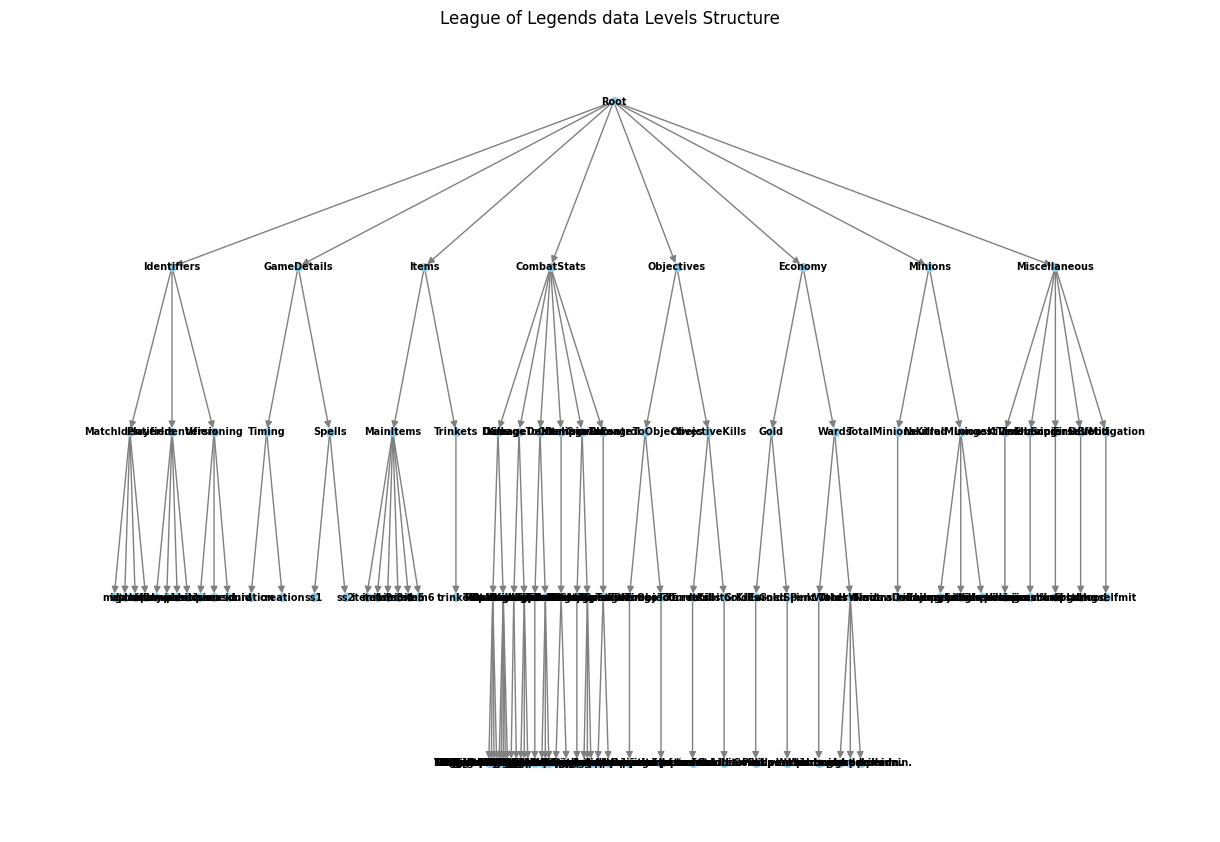

In [15]:
import matplotlib.pyplot as plt
import networkx as nx


# Define the function to add nodes and edges to the graph
def add_nodes_edges(graph, parent_name, parent_dict):
    for key, value in parent_dict.items():
        if isinstance(value, dict):
            graph.add_node(key)
            graph.add_edge(parent_name, key)
            add_nodes_edges(graph, key, value)
        else:
            graph.add_node(value)
            graph.add_edge(parent_name, value)


# Create a new directed graph
G = nx.DiGraph()

# Add the root node
root_name = "Root"
G.add_node(root_name)

# Add nodes and edges to the graph
add_nodes_edges(G, root_name, partition_hierarchy5)


# Define a top-down hierarchical layout
def hierarchy_pos(G, root=None, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos


def _hierarchy_pos(
    G,
    root,
    width=1.0,
    vert_gap=0.2,
    vert_loc=0,
    xcenter=0.5,
    pos=None,
    parent=None,
    parsed=[],
):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)

    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)

    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width / 2 - dx / 2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(
                G,
                child,
                width=dx,
                vert_gap=vert_gap,
                vert_loc=vert_loc - vert_gap,
                xcenter=nextx,
                pos=pos,
                parent=root,
                parsed=parsed,
            )

    return pos


# Draw the graph using the hierarchical layout
plt.figure(figsize=(12, 8))
pos = hierarchy_pos(G, root=root_name)
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_size=30,
    node_color="skyblue",
    font_size=7,
    font_weight="bold",
    edge_color="gray",
)
plt.title("League of Legends data Levels Structure")
plt.show()

In [16]:
# build a masker from partition tree
masker = shap.maskers.Partition(X, clustering=partition_tree)
partition_masker = shap.maskers.Partition(X)

# build explainer objects
# raw_explainer = shap.PartitionExplainer(model.predict, X) # we can make this syntax supportable setting the clustering method as baseline
masker_explainer = shap.PartitionExplainer(model.predict, masker)
partition_explainer = shap.PartitionExplainer(
    model.predict, partition_masker, partition_tree=partition_hierarchy_2
)

# compute SHAP values
# raw_winter_values = raw_explainer(instance)
masker_winter_values = masker_explainer(references)
partition_winter_values = partition_explainer(references)

In [17]:
# comparison the masker and the original data sizes
print(f"X size: {sys.getsizeof(X)/1024:.2f} kB")
print(f"masker size: {sys.getsizeof(masker)} B")

X size: 1290.16 kB
masker size: 56 B


In [18]:
model.predict(instance)

array([4.4311104], dtype=float32)

## Compare to Tree SHAP

In [20]:
exact_explainer = shap.ExactExplainer(model.predict, X)
exact_shap_values = exact_explainer(references)

tree_explainer = shap.TreeExplainer(model, X)
tree_shap_values = tree_explainer(references)

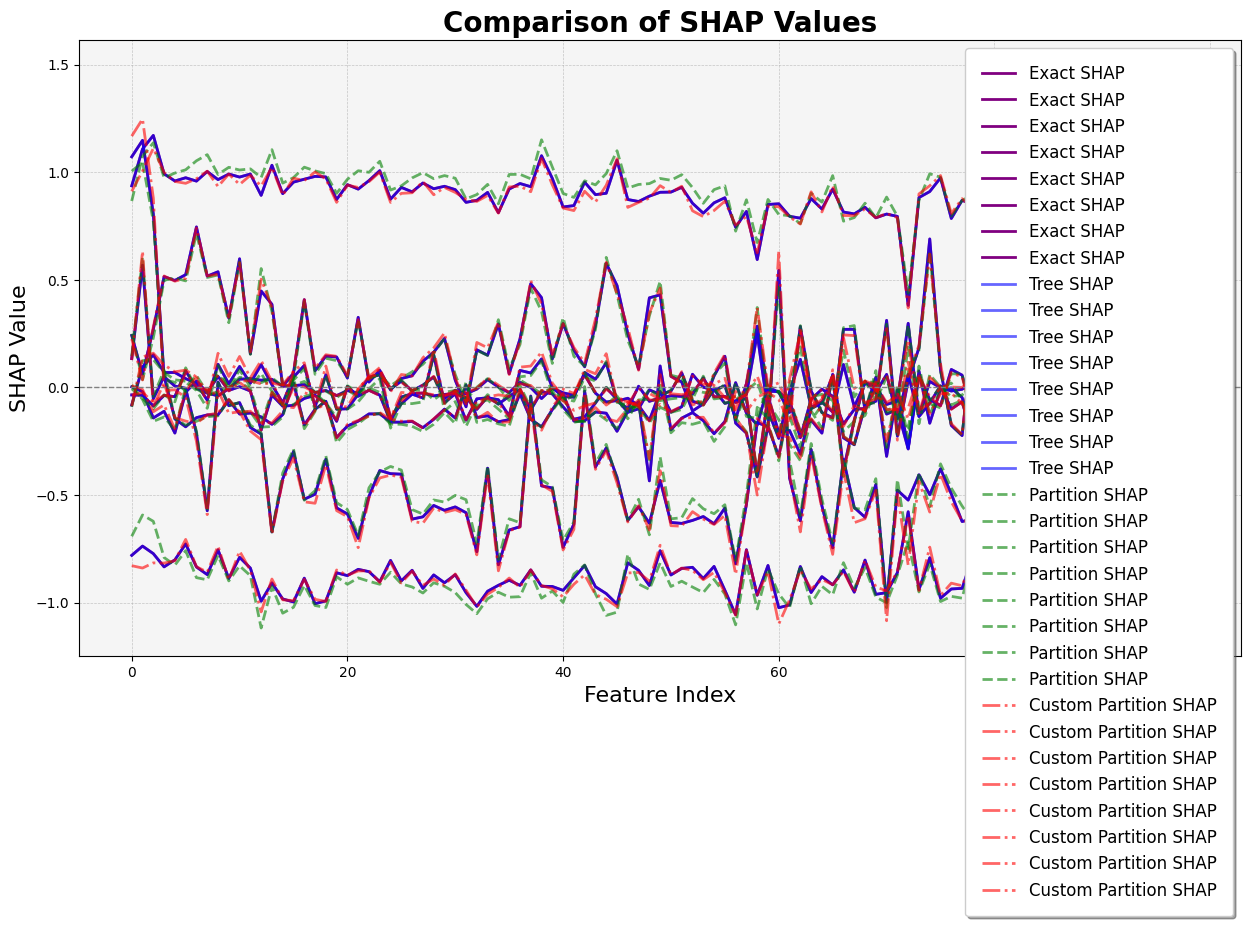

In [21]:
plt.figure(figsize=(15, 8))

# Plot the SHAP values with enhanced visibility
plt.plot(
    exact_shap_values.values,
    linestyle="-",
    linewidth=2,
    label="Exact SHAP",
    color="purple",
)
plt.plot(
    tree_shap_values.values,
    linestyle="-",
    linewidth=2,
    label="Tree SHAP",
    color="blue",
    alpha=0.6,
)
plt.plot(
    masker_winter_values.values,
    linestyle="--",
    linewidth=2,
    label="Partition SHAP",
    color="green",
    alpha=0.6,
)
plt.plot(
    partition_winter_values.values,
    linestyle="-.",
    linewidth=2,
    label="Custom Partition SHAP",
    color="red",
    alpha=0.6,
)

# Adding title and labels with increased font sizes
plt.title("Comparison of SHAP Values", fontsize=20, fontweight="bold")
plt.xlabel("Feature Index", fontsize=16)
plt.ylabel("SHAP Value", fontsize=16)

# Customizing the legend for better readability
plt.legend(
    loc="upper right",
    fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=True,
    borderpad=1,
)

# Adding a grid for better readability
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Adding a light grey background
plt.gca().set_facecolor("whitesmoke")

# Adding a horizontal line at y=0 for reference
plt.axhline(0, color="grey", linestyle="--", linewidth=1)

# Display the plot
plt.show()

In [22]:
exact_shap_values.values[:20]

array([[ 1.0712395 , -0.08238182,  0.13351605, -0.03523287,  0.00207672,
         0.24078715, -0.78058583,  0.93623613],
       [ 1.14776511,  0.09438272,  0.56744352, -0.0368624 , -0.01993668,
         0.06170444, -0.73764524,  1.10753903],
       [ 0.80603405,  0.15119063, -0.05289452, -0.08628006, -0.14228528,
         0.270103  , -0.77260234,  1.17062062],
       [ 0.04916188,  0.06902264,  0.05102105, -0.03763712, -0.11125153,
         0.51425356, -0.83420685,  0.99203513],
       [ 0.00598692,  0.06883805, -0.14661919, -0.04319884, -0.2125    ,
         0.49675803, -0.80151151,  0.95883632],
       [-0.00455339,  0.04062934, -0.18334864,  0.07626316, -0.02261149,
         0.52351328, -0.72791056,  0.97392588],
       [-0.21385885,  0.01768829, -0.14093005, -0.00485311,  0.02932365,
         0.74534638, -0.83466072,  0.95826145],
       [-0.57337492, -0.05925951, -0.12821151, -0.02694965, -0.02432392,
         0.51654815, -0.87011493,  1.00301959],
       [ 0.02486919,  0.10716462

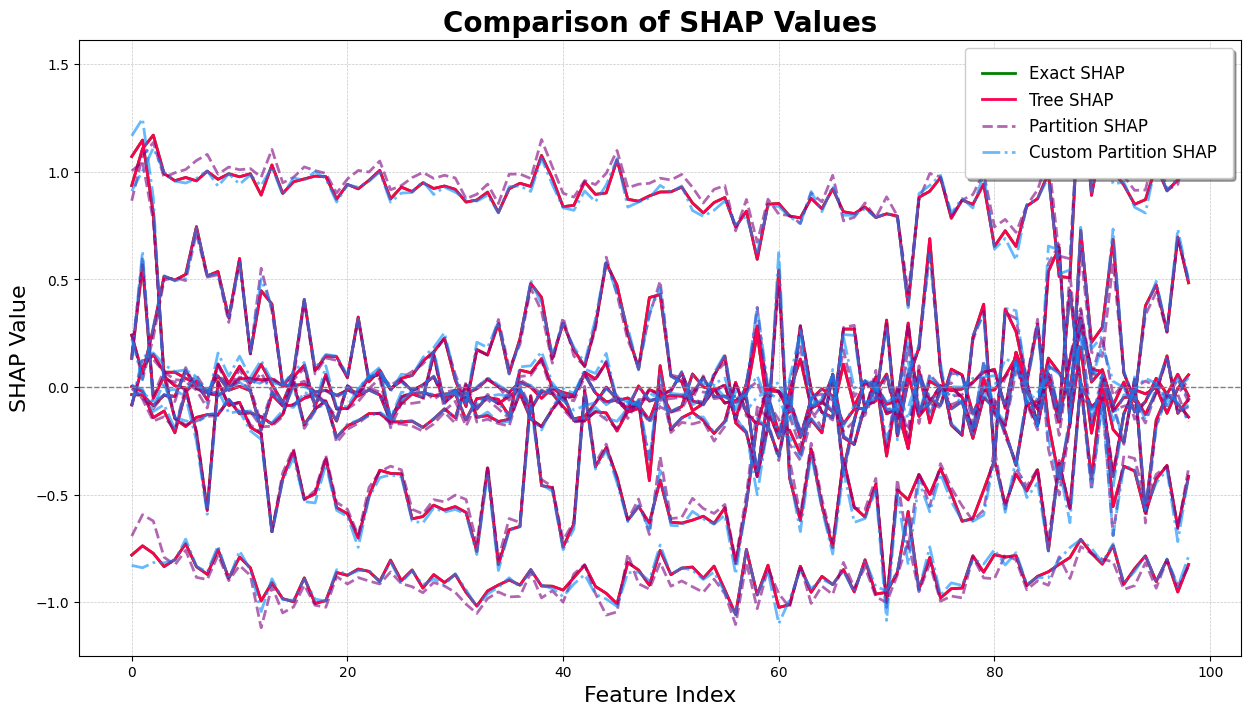

In [23]:
import matplotlib.pyplot as plt
import numpy as np  # Make sure to import numpy
from skimage.color import lab2rgb, lch2lab


def lch2rgb(x):
    return lab2rgb(lch2lab([[x]]))[0][0]


blue_lch = [54.0, 70.0, 4.6588]
red_lch = [54.0, 90.0, 0.35470565 + 2 * np.pi]

plt.figure(figsize=(15, 8))

# Plot the SHAP values with enhanced visibility
plt.plot(
    exact_shap_values.values,
    linestyle="-",
    linewidth=2,
    label="Exact SHAP",
    color="green",
)
plt.plot(
    tree_shap_values.values,
    linestyle="-",
    linewidth=2,
    label="Tree SHAP",
    color=lch2rgb(red_lch),
    alpha=1,
)
plt.plot(
    masker_winter_values.values,
    linestyle="--",
    linewidth=2,
    label="Partition SHAP",
    color="purple",
    alpha=0.6,
)
plt.plot(
    partition_winter_values.values,
    linestyle="-.",
    linewidth=2,
    label="Custom Partition SHAP",
    color=lch2rgb(blue_lch),
    alpha=0.6,
)

# Adding title and labels with increased font sizes
plt.title("Comparison of SHAP Values", fontsize=20, fontweight="bold")
plt.xlabel("Feature Index", fontsize=16)
plt.ylabel("SHAP Value", fontsize=16)

# Customizing the legend for better readability
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    loc="upper right",
    fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=True,
    borderpad=1,
)

# Adding a grid for better readability
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Adding a white background
plt.gca().set_facecolor("white")

# Adding a horizontal line at y=0 for reference
plt.axhline(0, color="grey", linestyle="--", linewidth=1)

plt.savefig(
    r"C:\Users\azabe\Documents\GitHub\Winter_values\winter_values\reports\approximation.png"
)

# Display the plot
plt.show()

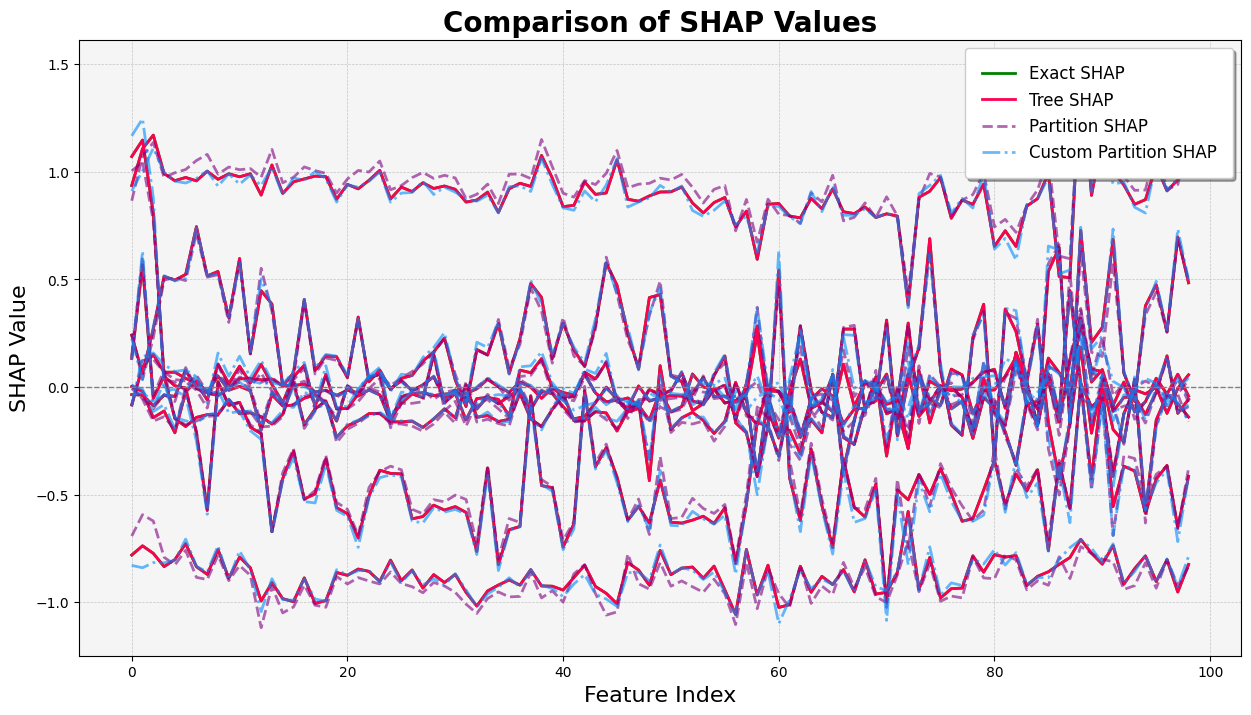

In [24]:
import matplotlib.pyplot as plt


def lch2rgb(x):
    return lab2rgb(lch2lab([[x]]))[0][0]


blue_lch = [54.0, 70.0, 4.6588]
red_lch = [54.0, 90.0, 0.35470565 + 2 * np.pi]

plt.figure(figsize=(15, 8))

# Plot the SHAP values with enhanced visibility
plt.plot(
    exact_shap_values.values,
    linestyle="-",
    linewidth=2,
    label="Exact SHAP",
    color="green",
)
plt.plot(
    tree_shap_values.values,
    linestyle="-",
    linewidth=2,
    label="Tree SHAP",
    color=lch2rgb(red_lch),
    alpha=1,
)
plt.plot(
    masker_winter_values.values,
    linestyle="--",
    linewidth=2,
    label="Partition SHAP",
    color="purple",
    alpha=0.6,
)
plt.plot(
    partition_winter_values.values,
    linestyle="-.",
    linewidth=2,
    label="Custom Partition SHAP",
    color=lch2rgb(blue_lch),
    alpha=0.6,
)

# Adding title and labels with increased font sizes
plt.title("Comparison of SHAP Values", fontsize=20, fontweight="bold")
plt.xlabel("Feature Index", fontsize=16)
plt.ylabel("SHAP Value", fontsize=16)

# Customizing the legend for better readability
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    loc="upper right",
    fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=True,
    borderpad=1,
)

# Adding a grid for better readability
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Adding a light grey background
plt.gca().set_facecolor("whitesmoke")

# Adding a horizontal line at y=0 for reference
plt.axhline(0, color="grey", linestyle="--", linewidth=1)

# Display the plot
plt.show()

Partition SHAP values using a partition tree are nice estimation of SHAP values. The partition tree is a good way to reduce the number of input features and speed up the computation.

## Plots to explain the instance

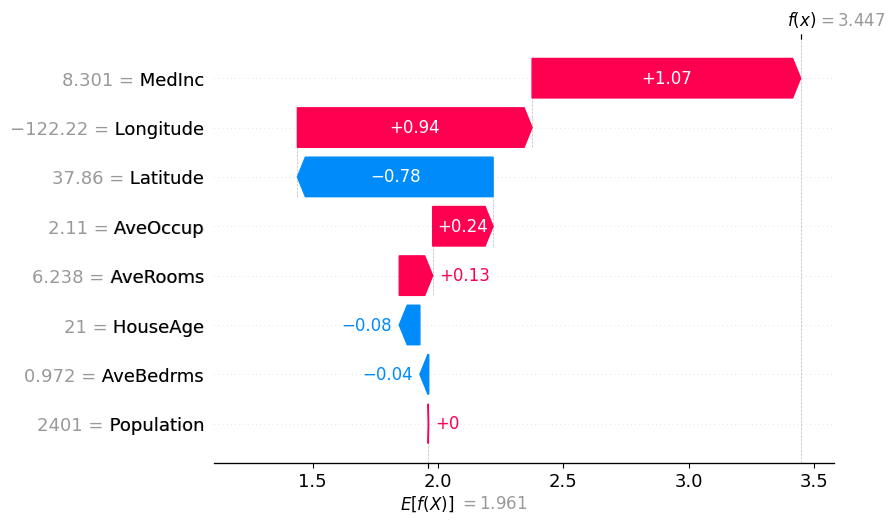

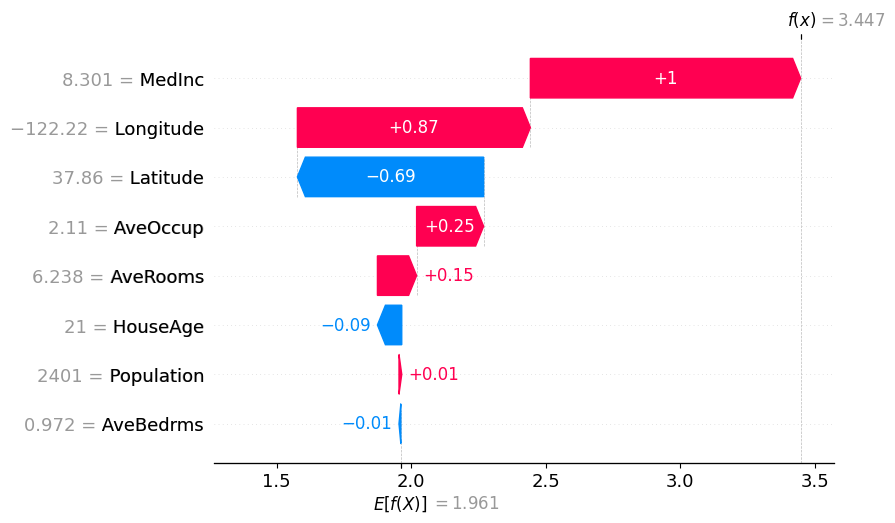

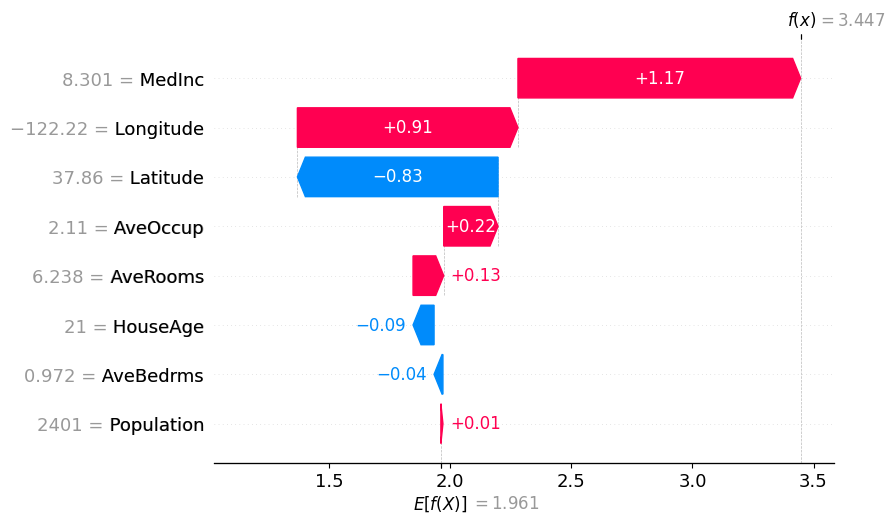

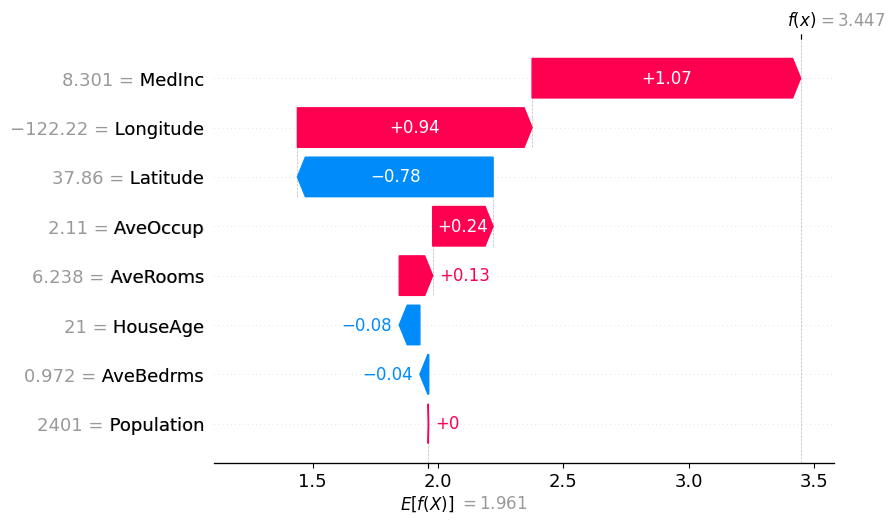

In [27]:
shap.plots.waterfall(exact_shap_values[0])
shap.plots.waterfall(masker_winter_values[0])
shap.plots.waterfall(partition_winter_values[0])
shap.plots.waterfall(tree_shap_values[0])

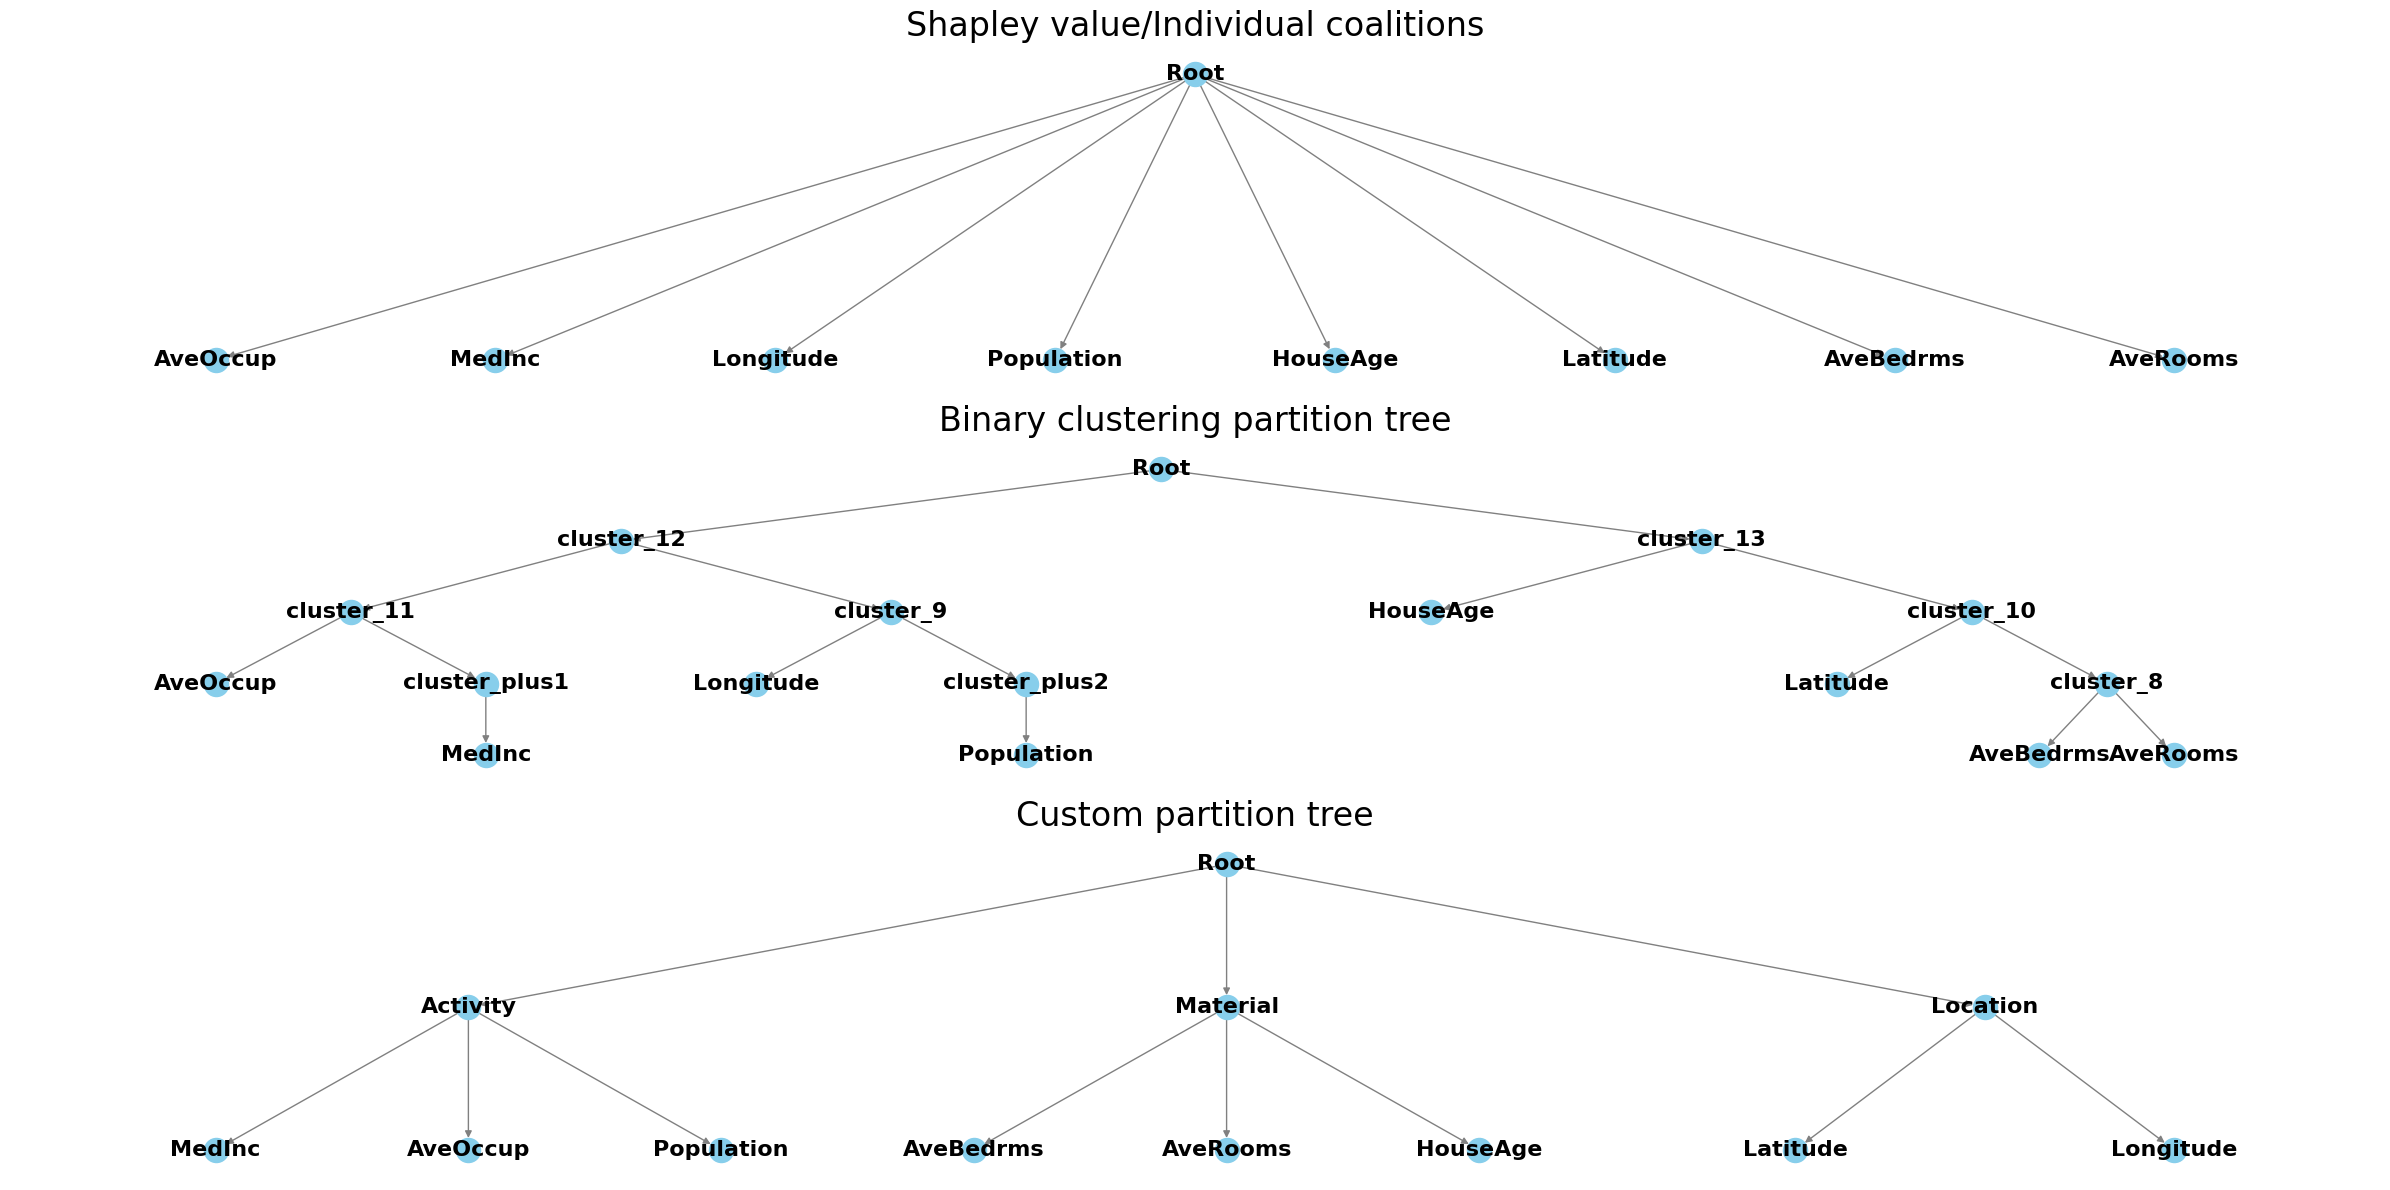

In [28]:
fig, axes = plt.subplots(3, figsize=(24, 12))

G = nx.DiGraph()
root_name = "Root"
G.add_node(root_name)
add_nodes_edges(G, root_name, partition_hierarchy_3)
pos = hierarchy_pos(G, root=root_name)
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_size=300,
    node_color="skyblue",
    font_size=16,
    font_weight="bold",
    edge_color="gray",
    ax=axes[0],
)
axes[0].set_title("Shapley value/Individual coalitions", fontsize=24)

# Plot the first hierarchical tree
G = nx.DiGraph()
root_name = "Root"
G.add_node(root_name)
add_nodes_edges(G, root_name, partition_hierarchy_1)
pos = hierarchy_pos(G, root=root_name)
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_size=300,
    node_color="skyblue",
    font_size=16,
    font_weight="bold",
    edge_color="gray",
    ax=axes[1],
)
axes[1].set_title("Binary clustering partition tree", fontsize=24)

# Plot the second hierarchical tree
G = nx.DiGraph()
root_name = "Root"
G.add_node(root_name)
add_nodes_edges(G, root_name, partition_hierarchy_2)
pos = hierarchy_pos(G, root=root_name)
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_size=300,
    node_color="skyblue",
    font_size=16,
    font_weight="bold",
    edge_color="gray",
    ax=axes[2],
)
axes[2].set_title("Custom partition tree", fontsize=24)

# Plot the third hierarchical tree


plt.tight_layout()

plt.savefig(
    r"C:\Users\azabe\Documents\GitHub\Winter_values\winter_values\hierarchical_trees.png"
)
plt.show()

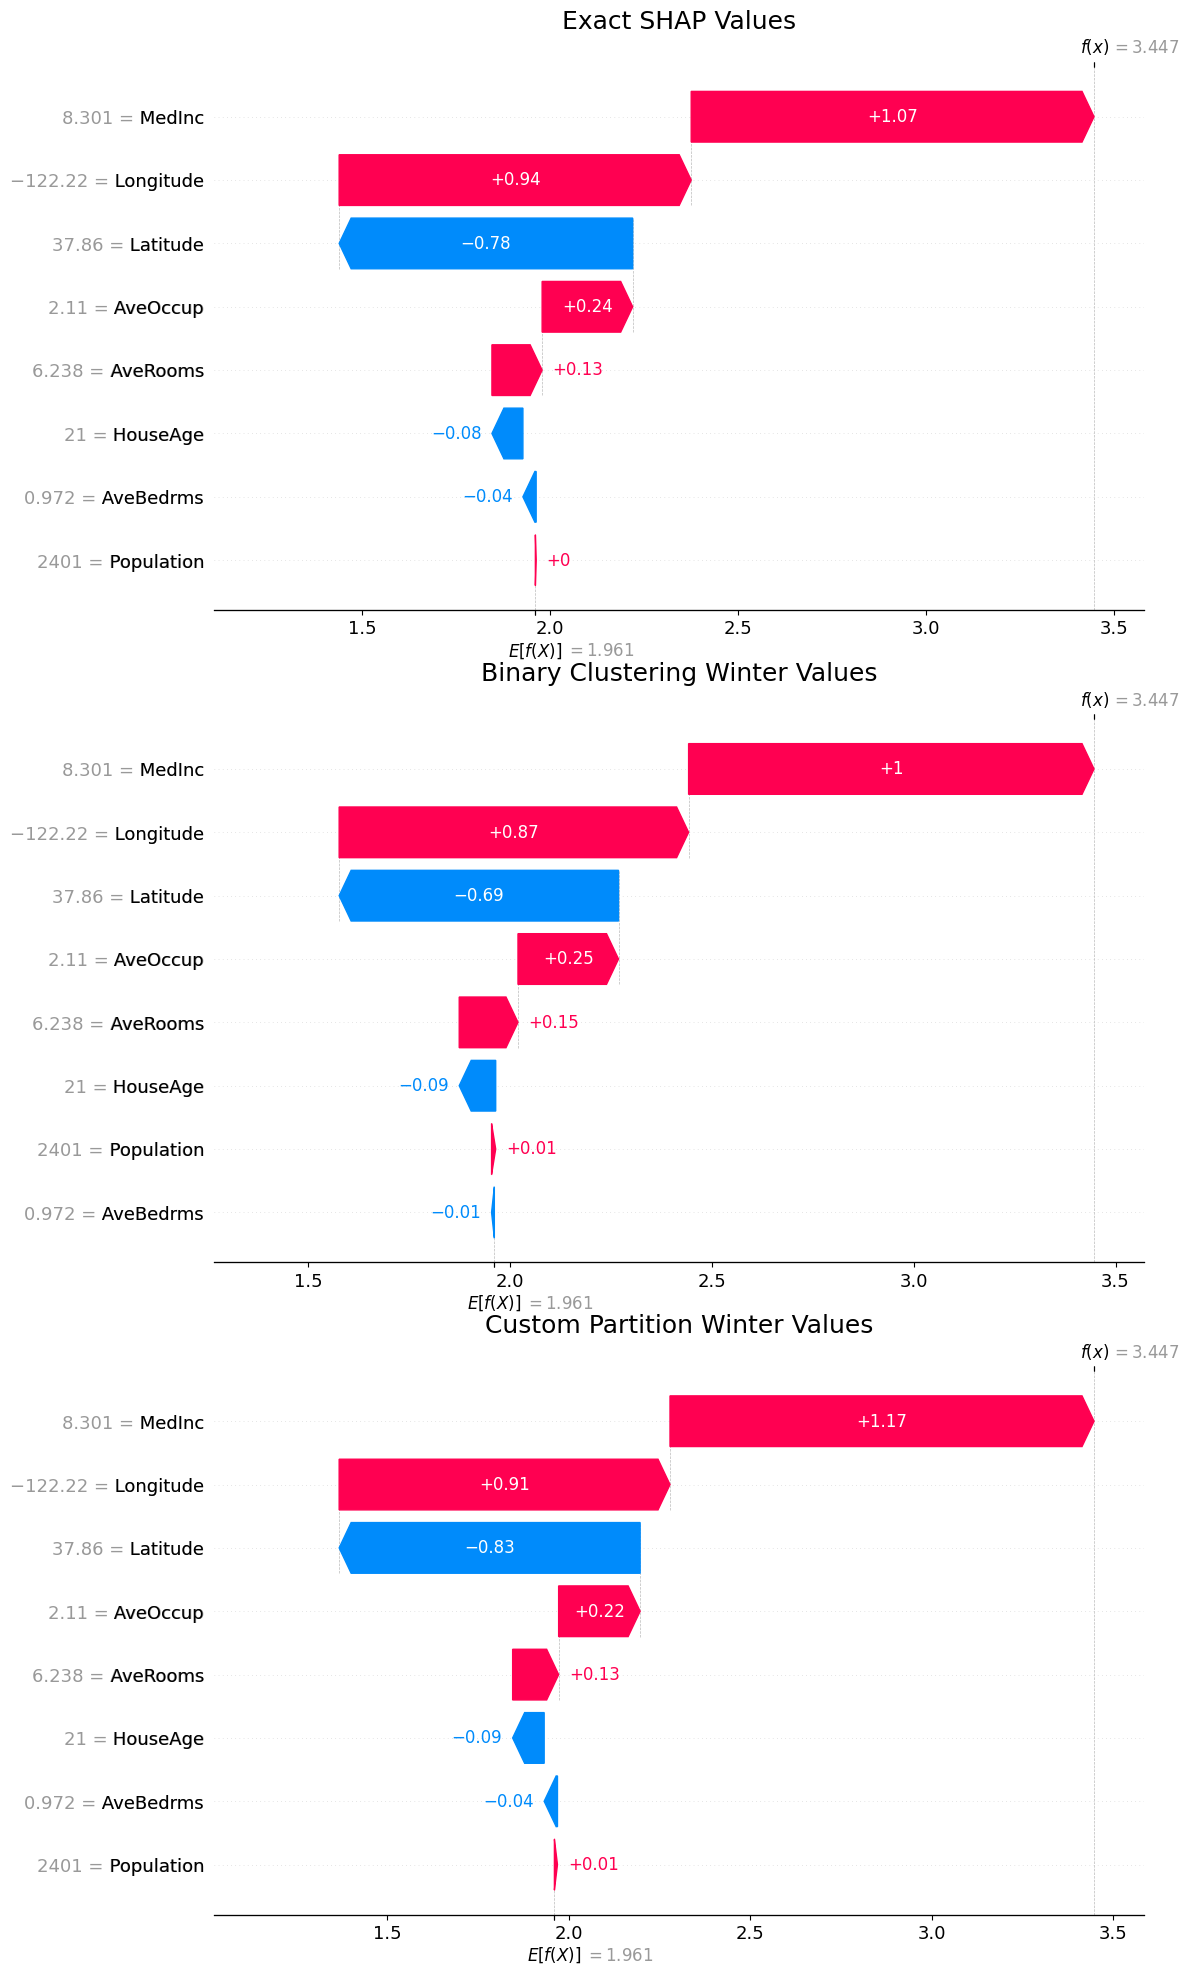

In [29]:
plt.clf()
plt.close()

# Adjust the figsize to make the plot taller
fig, axes = plt.subplots(3, 1, figsize=(4, 6))

# Plot the SHAP waterfall plots
plt.sca(axes[0])
shap.waterfall_plot(exact_shap_values[0], show=False)
plt.gcf().set_size_inches(12, 24)
axes[0].set_title("Exact SHAP Values", fontsize=18)

plt.sca(axes[1])
shap.waterfall_plot(masker_winter_values[0], show=False)
plt.gcf().set_size_inches(12, 24)
axes[1].set_title("Binary Clustering Winter Values", fontsize=18)

plt.sca(axes[2])
shap.waterfall_plot(partition_winter_values[0], show=False)
plt.gcf().set_size_inches(12, 24)
axes[2].set_title("Custom Partition Winter Values", fontsize=18)

# Adjust layout
plt.subplots_adjust(hspace=0.2)
# Save the figure
plt.savefig(
    r"C:\Users\azabe\Documents\GitHub\Winter_values\winter_values\reports\winter_values_calif.png"
)

# Show the plot
plt.show()

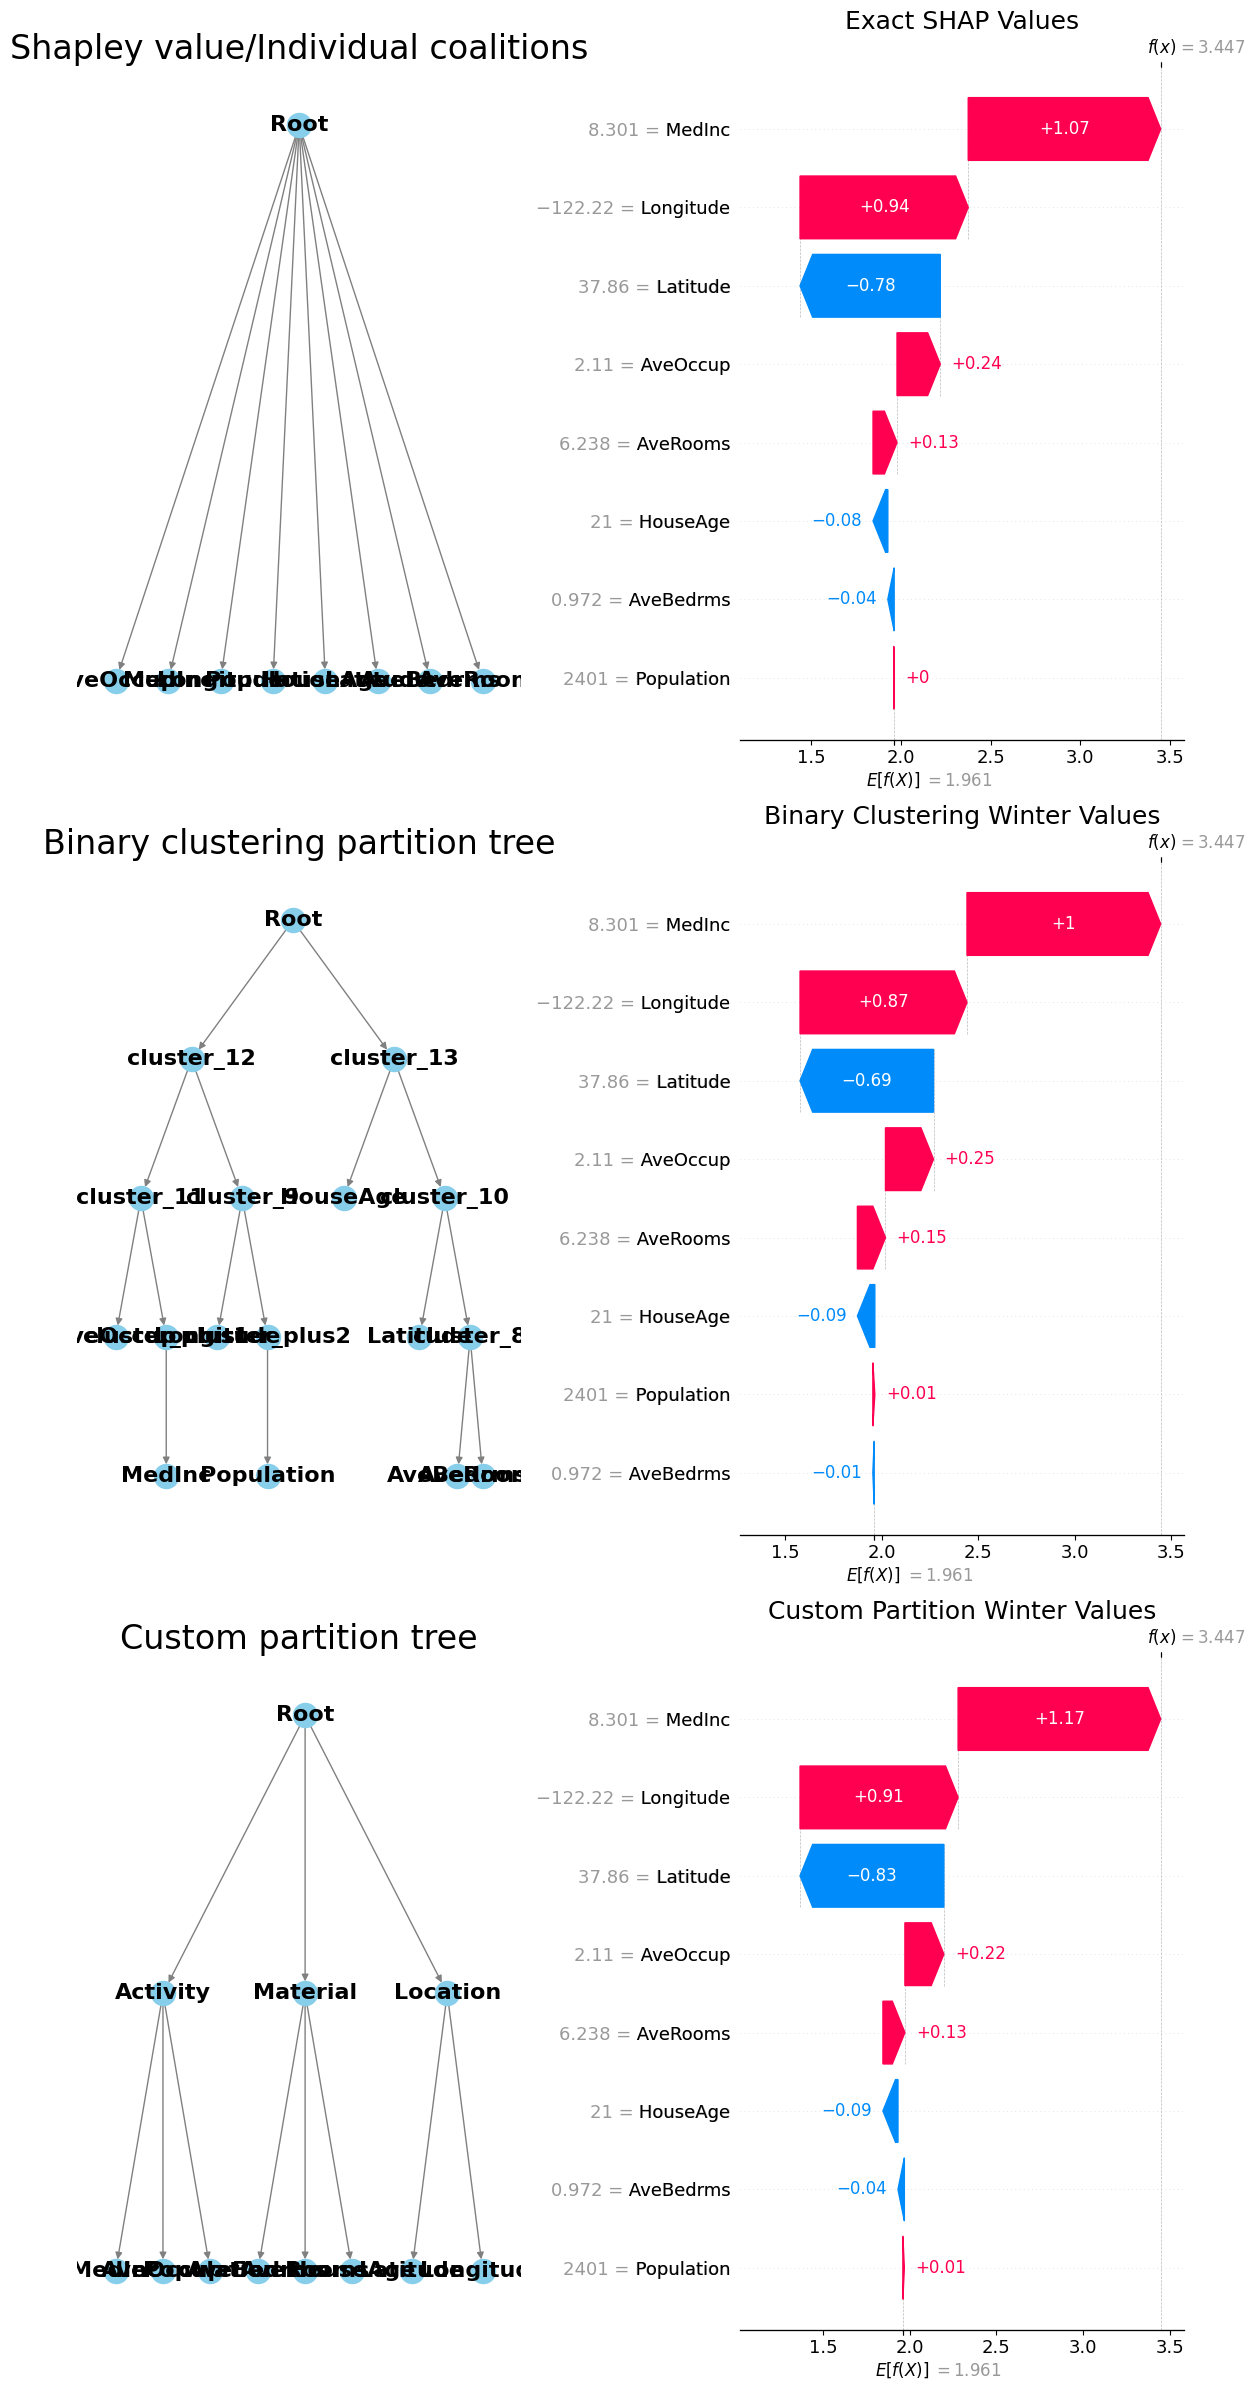

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(24, 36))

# Plot the first hierarchical tree
G = nx.DiGraph()
root_name = "Root"
G.add_node(root_name)
add_nodes_edges(G, root_name, partition_hierarchy_3)
pos = hierarchy_pos(G, root=root_name)
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_size=300,
    node_color="skyblue",
    font_size=16,
    font_weight="bold",
    edge_color="gray",
    ax=axes[0, 0],
)
axes[0, 0].set_title("Shapley value/Individual coalitions", fontsize=24)

# Plot the second hierarchical tree
G = nx.DiGraph()
root_name = "Root"
G.add_node(root_name)
add_nodes_edges(G, root_name, partition_hierarchy_1)
pos = hierarchy_pos(G, root=root_name)
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_size=300,
    node_color="skyblue",
    font_size=16,
    font_weight="bold",
    edge_color="gray",
    ax=axes[1, 0],
)
axes[1, 0].set_title("Binary clustering partition tree", fontsize=24)

# Plot the third hierarchical tree
G = nx.DiGraph()
root_name = "Root"
G.add_node(root_name)
add_nodes_edges(G, root_name, partition_hierarchy_2)
pos = hierarchy_pos(G, root=root_name)
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_size=300,
    node_color="skyblue",
    font_size=16,
    font_weight="bold",
    edge_color="gray",
    ax=axes[2, 0],
)
axes[2, 0].set_title("Custom partition tree", fontsize=24)

# Plot the SHAP waterfall plots
plt.sca(axes[0, 1])
shap.waterfall_plot(exact_shap_values[0], show=False)
plt.gcf().set_size_inches(12, 24)
axes[0, 1].set_title("Exact SHAP Values", fontsize=18)

plt.sca(axes[1, 1])
shap.waterfall_plot(masker_winter_values[0], show=False)
plt.gcf().set_size_inches(12, 24)
axes[1, 1].set_title("Binary Clustering Winter Values", fontsize=18)

plt.sca(axes[2, 1])
shap.waterfall_plot(partition_winter_values[0], show=False)
plt.gcf().set_size_inches(12, 24)
axes[2, 1].set_title("Custom Partition Winter Values", fontsize=18)

# Adjust layout
plt.tight_layout()

# Save the figure
# plt.savefig(r'C:\Users\azabe\Documents\GitHub\Winter_values\winter_values\hierarchical_trees_and_shap_plots.png')

# Show the plot
plt.show()

In [31]:
partition_explainer_3 = shap.PartitionExplainer(
    model.predict, partition_masker, partition_tree=partition_hierarchy_3
)
partition_explainer_1 = shap.PartitionExplainer(
    model.predict, partition_masker, partition_tree=partition_hierarchy_1
)
partition_explainer_2 = shap.PartitionExplainer(
    model.predict, partition_masker, partition_tree=partition_hierarchy_2
)

partition_winter_values_3 = partition_explainer_3(references)
partition_winter_values_1 = partition_explainer_1(references)
partition_winter_values_2 = partition_explainer_2(references)

PartitionExplainer explainer: 100it [00:10,  2.11s/it]                       


In [32]:
partition_winter_values_1 = partition_explainer_1(references)

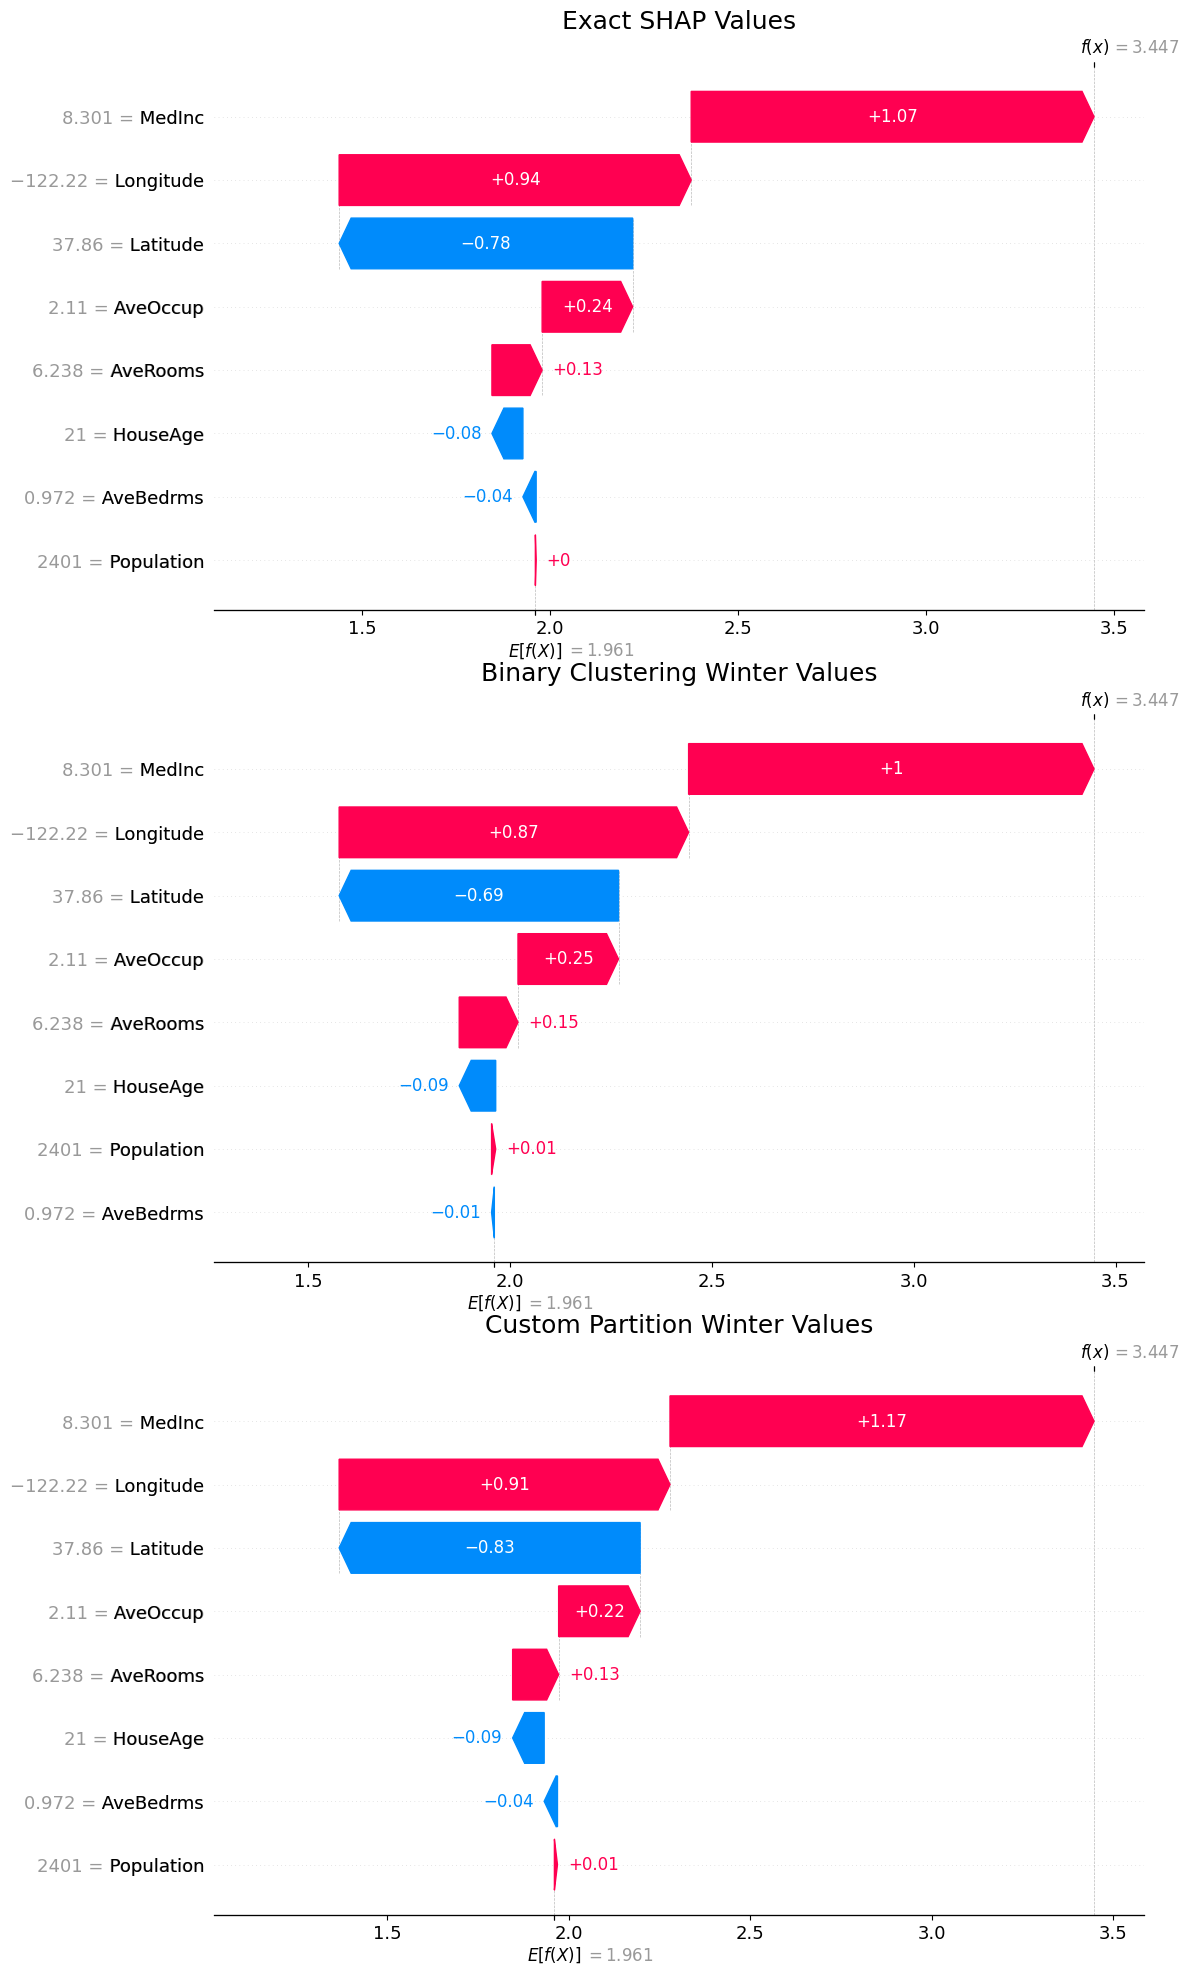

In [33]:
plt.clf()
plt.close()

# Adjust the figsize to make the plot taller
fig, axes = plt.subplots(3, 1, figsize=(4, 6))

# Plot the SHAP waterfall plots
plt.sca(axes[0])
shap.waterfall_plot(partition_winter_values_3[0], show=False)
plt.gcf().set_size_inches(12, 24)
axes[0].set_title("Exact SHAP Values", fontsize=18)

plt.sca(axes[1])
shap.waterfall_plot(partition_winter_values_1[0], show=False)
plt.gcf().set_size_inches(12, 24)
axes[1].set_title("Binary Clustering Winter Values", fontsize=18)

plt.sca(axes[2])
shap.waterfall_plot(partition_winter_values_2[0], show=False)
plt.gcf().set_size_inches(12, 24)
axes[2].set_title("Custom Partition Winter Values", fontsize=18)

# Adjust layout
plt.subplots_adjust(hspace=0.2)
# Save the figure
plt.savefig(
    r"C:\Users\azabe\Documents\GitHub\Winter_values\winter_values\reports\winter_values_calif_mine.png"
)

# Show the plot
plt.show()

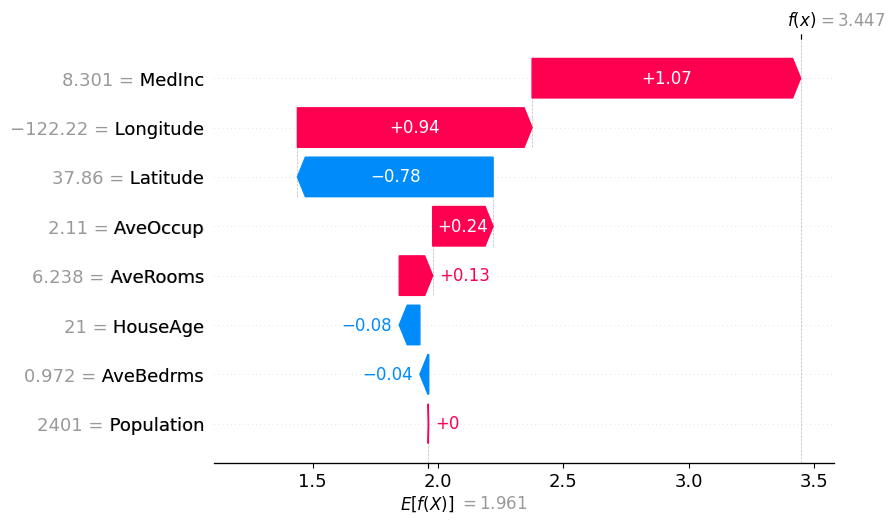

In [34]:
shap.plots.waterfall(exact_shap_values[0])

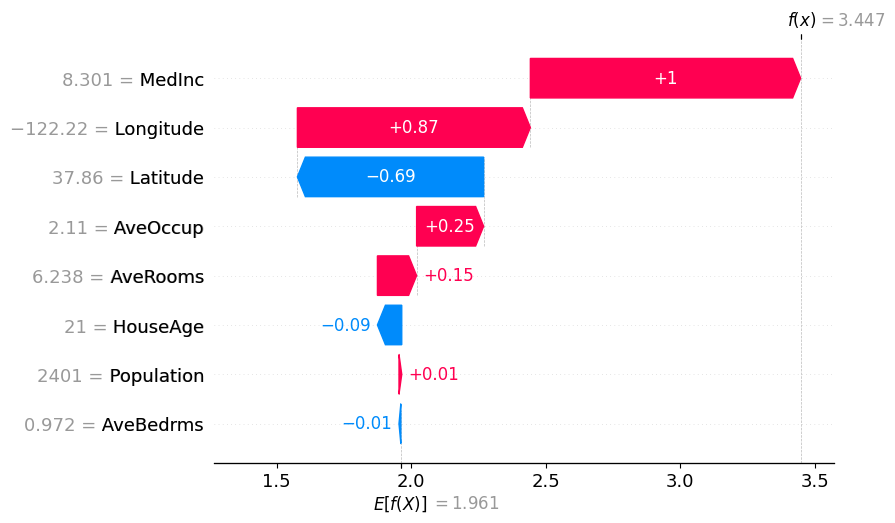

In [35]:
shap.plots.waterfall(masker_winter_values[0])

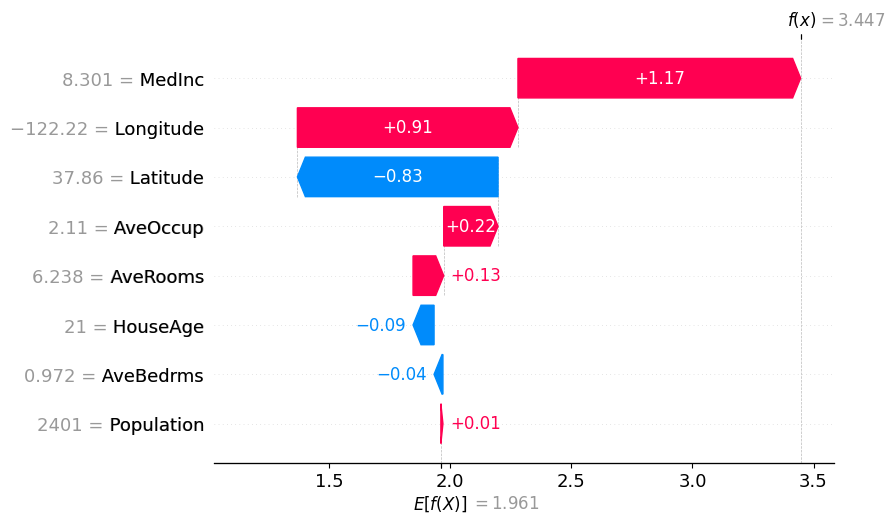

In [36]:
shap.plots.waterfall(partition_winter_values[0])

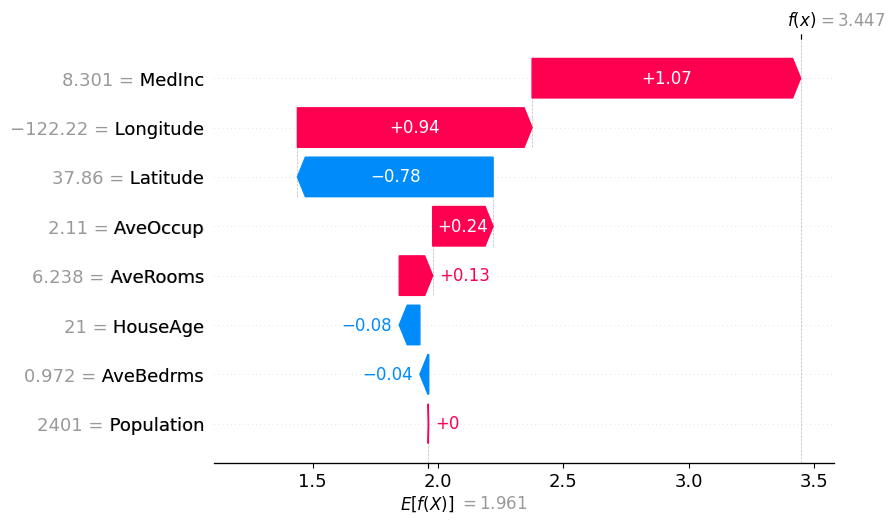

In [37]:
shap.plots.waterfall(tree_shap_values[0])

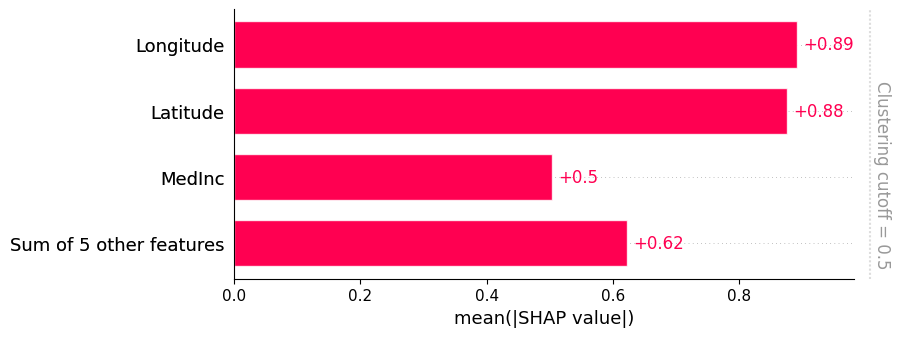

In [38]:
# Assuming the 'bar' function from your code is already defined, use it with the computed SHAP values
shap.plots.bar(
    partition_winter_values, max_display=4, clustering=partition_tree, show=True
)

In [39]:
clustered_winter_values = masker_explainer(references)

In [40]:
shap.force_plot(
    clustered_winter_values.base_values, clustered_winter_values.values, references
)

In [41]:
partition_winter_values = partition_explainer(references)

In [42]:
shap.force_plot(
    partition_winter_values.base_values, partition_winter_values.values, references
)

In [43]:
exact_shapley_values = exact_explainer(references)

In [44]:
shap.force_plot(
    exact_shapley_values.base_values, exact_shapley_values.values, references
)